In [67]:
import numpy as np
import matplotlib.pyplot as plt
from utils.classify_points import classify_points
from path_find_algorithms.a_star import a_star
from utils.extract_track_borders import extract_track_borders
from utils.center_line import get_center_line


In [72]:
with open('/home/parallels/Desktop/Parallels_Shared/Home/ros2_tas_project/to_be_saved/occupancy_grid.npy', 'rb') as f:
    occupancy_grid = np.load(f)

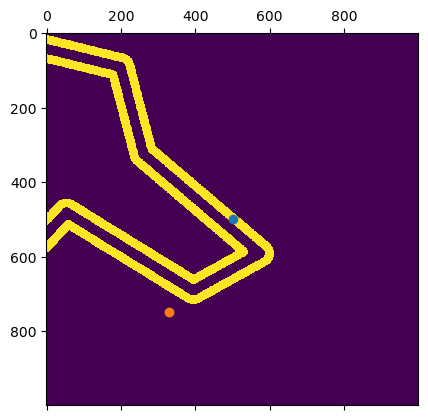

In [73]:
occupancy_grid_filtered = (occupancy_grid >30)*1
plt.matshow(occupancy_grid_filtered)
#plt.matshow(np.flip(occupancy_grid_filtered, 0))
plt.scatter(500,500)
plt.scatter(330, 750)

In [43]:
def get_world_frame_point(point, resolution, origin):
    point_x = (point[0] * resolution) + origin[0]
    point_y = (point[1] * resolution) + origin[1]
    return (point_x, point_y)

def world_frame_point_to_occupancy_grid_coordinates(point, resolution, origin):
    point_x = int((point[0] - origin[0]) /
                  resolution)

    point_y = int((point[1] - origin[1]) /
                  resolution)

    return (point_x, point_y)



In [51]:
print(get_world_frame_point((300,800), 0.05, (-24.95, -24.95)))
print(world_frame_point_to_occupancy_grid_coordinates((-9.375,13.175), 0.05, (-24.95, -24.95)))



(-9.95, 15.05)
(311, 762)


0

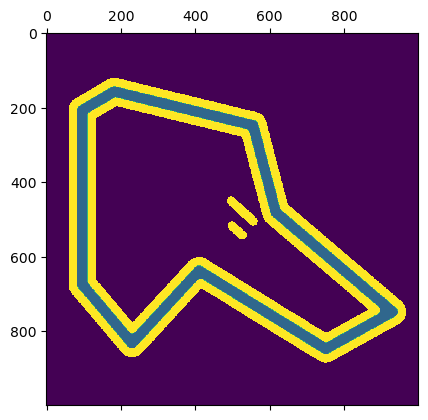

In [53]:
classified_grid = classify_points((311,762),occupancy_grid_filtered)
plt.matshow(classified_grid)

In [65]:
for i in range(300):
    if classified_grid[i, 200] == 1:
        print(i)

print(get_world_frame_point((200,160), 0.05, (-24.95, -24.95)))

148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
(-14.95, -16.95)


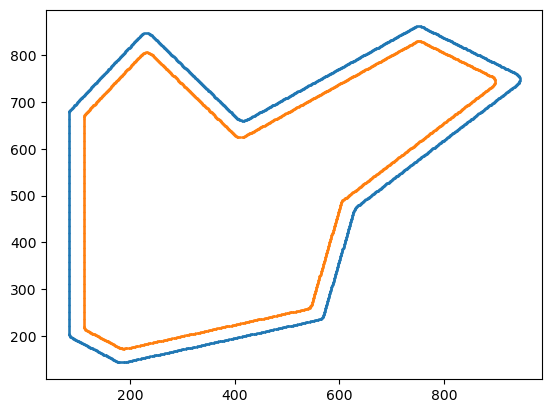

In [48]:
lines = extract_track_borders(classified_grid)

for line in lines:
    plt.scatter([p[0] for p in line], [p[1] for p in line], s=0.2)

backsolve_path


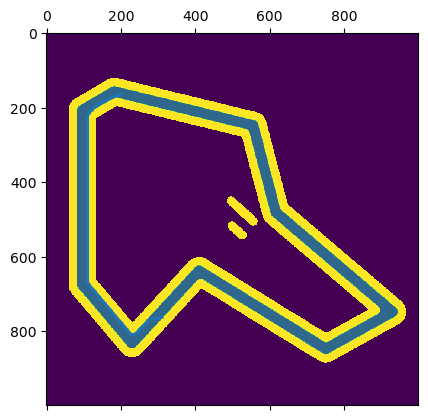

In [69]:
path = a_star((311, 762), (200, 160), classified_grid)
plt.matshow(classified_grid)

plt.scatter([p[1] for p in path], [p[0] for p in path], s=0.5)